In [2]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv('datas/autism_screening.csv')

In [4]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [5]:
df.shape

(704, 21)

In [6]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [7]:
df.select_dtypes(include=['int', 'float']).columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result'],
      dtype='object')

In [8]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

On note quelques erreurs d'orthographes dans les noms de certaines colonnes

In [9]:
df.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                46
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            6
Class/ASD           2
dtype: int64

On note une colonne avec une seule modalité qui n'apporte aucune information, donc on pourrra la supprimer

In [10]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


D'après la description des données, la valeur maximale de la colonne Age semble être problématique.

In [11]:
df.loc[df['age']==df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


Cependant, il n'ya qu'une seule ligne affectée, qu'on pourra supprimer durant le data cleaning

In [12]:
#valeurs nullles
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

Il ya deux valeurs nulles dans la colonne Age

In [13]:
# les différentes valeurs
for col in df.select_dtypes('O').columns:
    print(f'--------------------------------------------------------------------------------------\n\
          {col}: {df[col].unique()}\n')

--------------------------------------------------------------------------------------
          gender: ['f' 'm']

--------------------------------------------------------------------------------------
          ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

--------------------------------------------------------------------------------------
          jundice: ['no' 'yes']

--------------------------------------------------------------------------------------
          austim: ['no' 'yes']

--------------------------------------------------------------------------------------
          contry_of_res: ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 

la colonne ethnicity, relationcomporte un certain caractère '?' qu'on pourrait remplacer

In [14]:
#Cleaning
df_c = df.copy()
df_c.drop(df_c[df_c['age']==df_c['age'].max()].index,inplace=True)
df_c.reset_index(inplace=True)

In [15]:
df_c[['ethnicity','relation']] = df_c[['ethnicity','relation']].replace('?','Others')
df_c['ethnicity'] = df_c['ethnicity'].replace('others','Others')

In [16]:
#replace nan with mean of age 
df_c['age'].fillna(df_c['age'].mean, inplace=True)

/var/folders/gn/cr4yj18d1tv34pkws9v_kq1r0000gn/T/ipykernel_19981/1808133999.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0      26.0
1      24.0
2      27.0
3      35.0
4      40.0
       ... 
698    25.0
699    34.0
700    24.0
701    35.0
702    26.0
Name: age, Length: 703, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_c['age'].fillna(df_c['age'].mean, inplace=True)


In [17]:
df_c['age'].isnull().sum()

0

<Axes: title={'center': 'Proportion Homme/Femme atteints de ASD'}, xlabel='gender'>

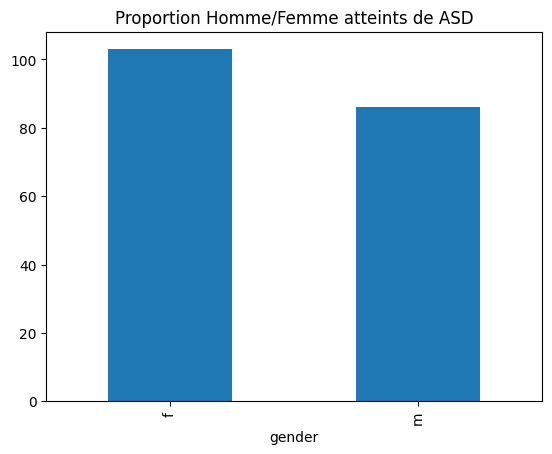

In [18]:
#Visualisation
df_c[df_c['Class/ASD'] == 'YES']['gender'].value_counts().plot(kind = 'bar', title="Proportion Homme/Femme atteints de ASD")

In [20]:
px.histogram(df_c, x = 'Class/ASD', title="Réparttion de la colonne cible Class/ASD")

In [31]:
asd_by_country = df_c[df_c['Class/ASD'] == 'YES']['contry_of_res'].value_counts().reset_index()
asd_by_country.columns = ['Country', 'ASD_Patients_Counts']

fig = px.pie(asd_by_country, names='Country', values='ASD_Patients_Counts',
             title='Le nombre de patients ASD par pays')
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=1.5)))
fig.show()